# 1. Pobranie i załadowanie danych

## 1.1 Instalowanie bibliotek


In [106]:
!pip install tensorflow



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\jakub\AppData\Local\Temp\pip-install-s5q6auc1\tensorflow-gpu_083bd053c7e248f1b98723e72bd804d0\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


In [108]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    3.0.0
astunparse                   1.6.3
certifi                      2024.12.14
charset-normalizer           3.4.1
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.12
decorator                    5.1.1
executing                    2.1.0
flatbuffers                  24.12.23
fonttools                    4.55.3
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.69.0
h5py                         3.12.1
idna                         3.10
ipykernel                    6.29.5
ipython                      8.31.0
jedi                         0.19.2
jupyter_client               8.6.3
jupyter_core                 5.7.2
keras                        3.8.0
kiwisolver                   1.4


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
import tensorflow as tf
import os

In [110]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [111]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpue in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [112]:
data_dir ='data'

# 1.3 Załadowanie danych

In [8]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 4409 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

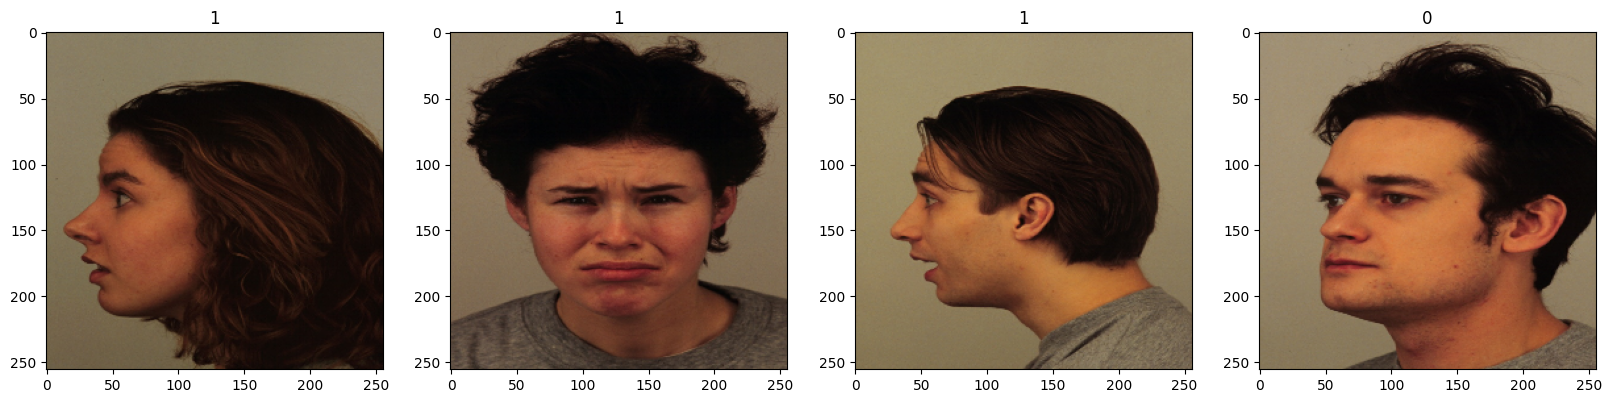

In [13]:
fig, ax =plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Przetwarzanie danych


## 2.1 Skalowanie danych


In [14]:
data = data.map(lambda x, y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()[0].min()

np.float32(0.0)

## 2.2 Podział danych

In [16]:
len(data)

138

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
test_size

13

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model

## 3.1 Deep model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\jakub\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2. Trenowanie modelu


In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 316ms/step - accuracy: 0.5544 - loss: 0.7902 - val_accuracy: 0.6944 - val_loss: 0.5882
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.7239 - loss: 0.5511 - val_accuracy: 0.8171 - val_loss: 0.4018
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.8324 - loss: 0.3830 - val_accuracy: 0.8843 - val_loss: 0.2808
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.8749 - loss: 0.2829 - val_accuracy: 0.9005 - val_loss: 0.2426
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.8995 - loss: 0.2143 - val_accuracy: 0.9062 - val_loss: 0.2328
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 315ms/step - accuracy: 0.9273 - loss: 0.1706 - val_accuracy: 0.9120 - val_loss: 0.2237
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 320ms/step - accuracy: 0.9486 - loss: 0.1238 - val_accuracy: 0.8900 - val_loss: 0.2994
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 305ms/step - accuracy: 0.9561 - loss: 0.1024 - val_accu

plot performance

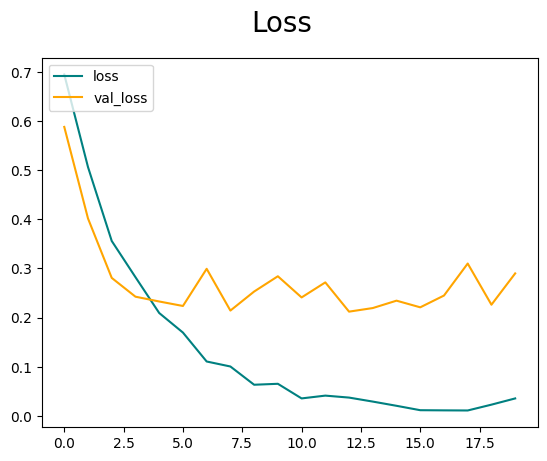

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

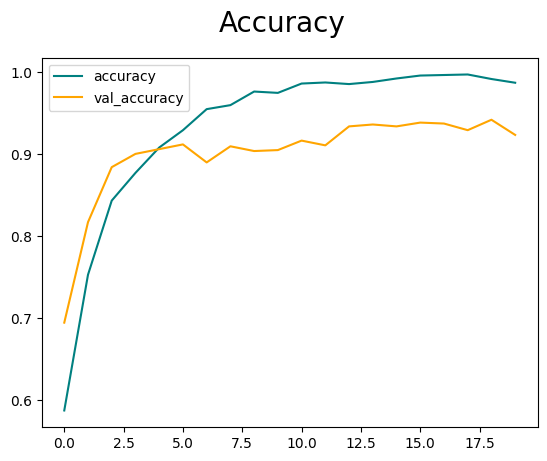

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 3.3. Ewaluacja modelu

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.92626727, shape=(), dtype=float32) tf.Tensor(0.8933333, shape=(), dtype=float32) tf.Tensor(0.90384614, shape=(), dtype=float32)


## 3.4. Testowanie modelu

In [75]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import cv2

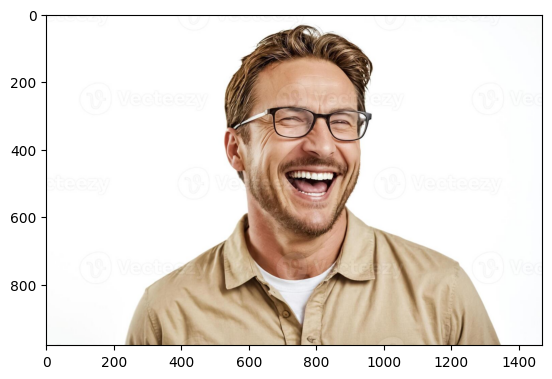

In [101]:
img = cv2.imread('test11.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

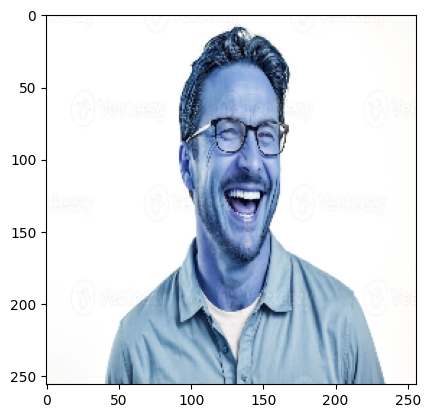

In [102]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [103]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [104]:
yhat

array([[0.96217126]], dtype=float32)

In [113]:
if yhat > 0.5:
    print(f'Przewidywana klasa to stres')
else:
    print(f'Przewidywana klasa to brak stresu')


Przewidywana klasa to stres
